In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [2]:
df = pd.read_csv('./cardio_train.csv', delimiter = ';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.isnull().values.any()


False

In [4]:
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.duplicated().sum()

0

### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.drop(df[(df['height'] > df['height'].quantile(0.975))|(df['height'] < df['height'].quantile(0.025)) ].index, inplace = True)

In [8]:
df.drop(df[(df['weight'] > df['weight'].quantile(0.975))|(df['weight'] < df['weight'].quantile(0.025)) ].index, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63866 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           63866 non-null  int64  
 1   age          63866 non-null  int64  
 2   gender       63866 non-null  int64  
 3   height       63866 non-null  int64  
 4   weight       63866 non-null  float64
 5   ap_hi        63866 non-null  int64  
 6   ap_lo        63866 non-null  int64  
 7   cholesterol  63866 non-null  int64  
 8   gluc         63866 non-null  int64  
 9   smoke        63866 non-null  int64  
 10  alco         63866 non-null  int64  
 11  active       63866 non-null  int64  
 12  cardio       63866 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.8 MB


In [10]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [11]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [12]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975))|(df['ap_hi'] < df['ap_hi'].quantile(0.025)) ].index, inplace = True)

In [13]:
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975))|(df['ap_lo'] < df['ap_lo'].quantile(0.025)) ].index, inplace = True)

In [14]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases


In [15]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,49895.698065,19468.719979,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228
std,28840.467755,2460.510296,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866
min,0.000000,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24867.500000,17677.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49902.500000,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74745.750000,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Feature Eng

In [16]:
# Converting age into years

df['age_years'] = (df['age']/365).round().astype('int')

In [17]:
df.drop(['age'], axis='columns', inplace=True)
df.drop(['id'], axis='columns', inplace=True)
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54
69994,1,165,80.0,150,80,1,1,0,0,1,1,58
69995,2,168,76.0,120,80,1,1,1,0,1,0,53
69998,1,163,72.0,135,80,1,2,0,0,0,1,61


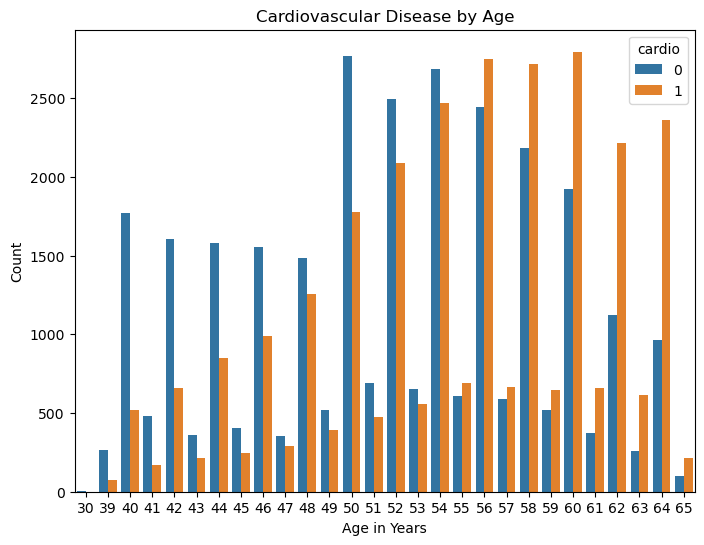

In [18]:
# Plotting the relationship between age in years and the presence of cardiovascular disease
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_years', hue='cardio')
plt.title('Cardiovascular Disease by Age')
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.show()

#### The graph displays the number of people with and without cardiovascular disease at various age ranges. The graph shows a rising prevalence of cardiovascular disease with older people. In particular, there is an apparent increase in the number of cases of cardiovascular disease in older age groups, indicating that age and a probability of developing cardiovascular disease are closely related.

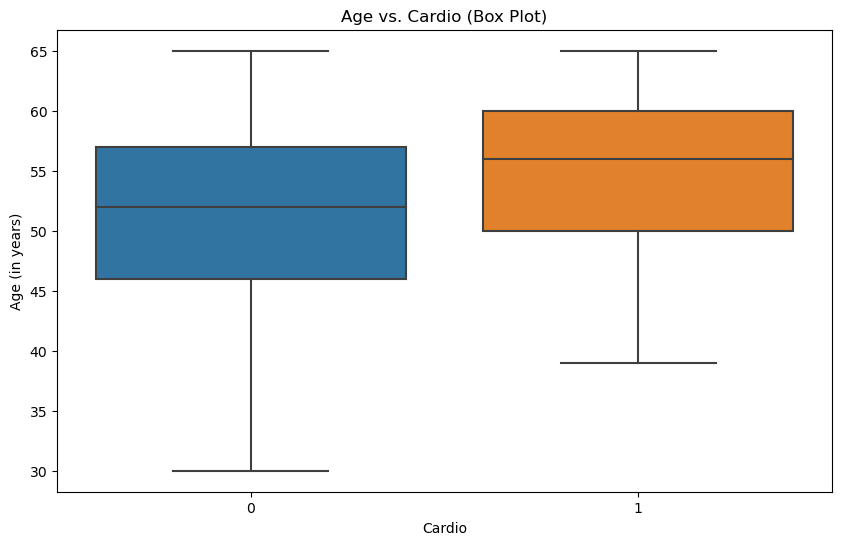

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='age_years', data=df)
plt.title('Age vs. Cardio (Box Plot)')
plt.xlabel('Cardio')
plt.ylabel('Age (in years)')
plt.show()

#### The boxplot demonstrates that people with cardiovascular disease have a greater median age than people without the condition. Furthermore, there is greater age variability within the cardiovascular disease population as indicated by the wider interquartile range (IQR) for this group of people.



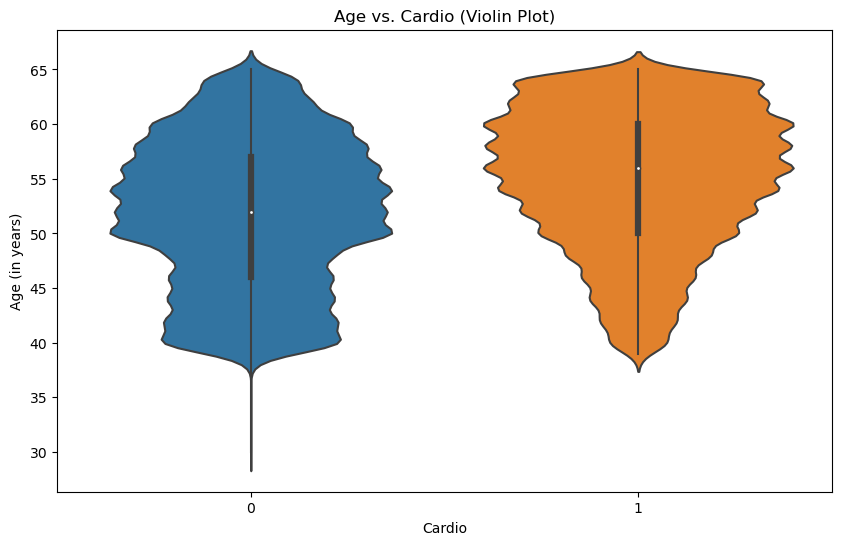

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cardio', y='age_years', data=df)
plt.title('Age vs. Cardio (Violin Plot)')
plt.xlabel('Cardio')
plt.ylabel('Age (in years)')
plt.show()

#### The correlation between cardiovascular disease and ageing is represented graphically by the violin plot. The plot displays the age distribution of people with and without cardiovascular disease, showing that those with the condition had a little higher median age. Plot width indicates that both groups had a higher density of middle-aged adults, with a greater proportion of older individuals with cardiovascular disease than those without.

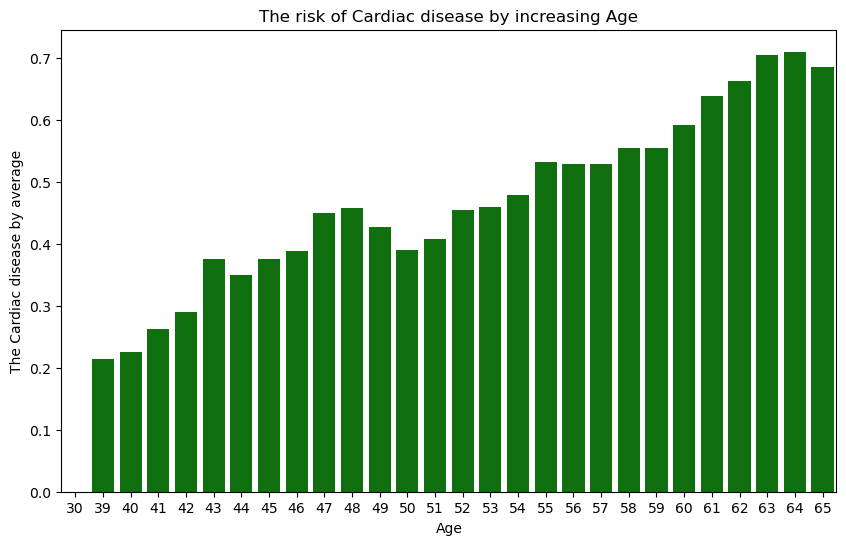

In [21]:
age_cardio = df.groupby('age_years')['cardio'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='age_years', y='cardio', data=age_cardio, color='green')
plt.title('The risk of Cardiac disease by increasing Age')
plt.xlabel('Age')
plt.ylabel('The Cardiac disease by average')
plt.show()


#### The risk of cardiac disease appears to increase with age, as indicated by the average prevalence of cardiovascular disease across different age groups.


In [22]:
bin_range = [0,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

bin_labels = [f'{bin_start}-{bin_end}'for bin_start, bin_end in zip(bin_range[:-1],bin_range[1:])]

df['age_bin'] = pd.cut(df['age_years'], bins = bin_range, labels = bin_labels)

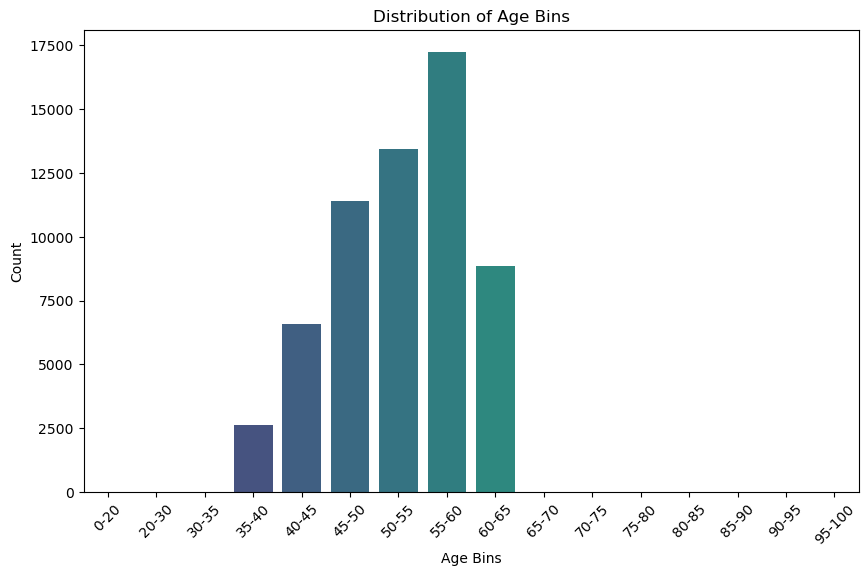

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_bin', data=df, palette='viridis') 
plt.title('Distribution of Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

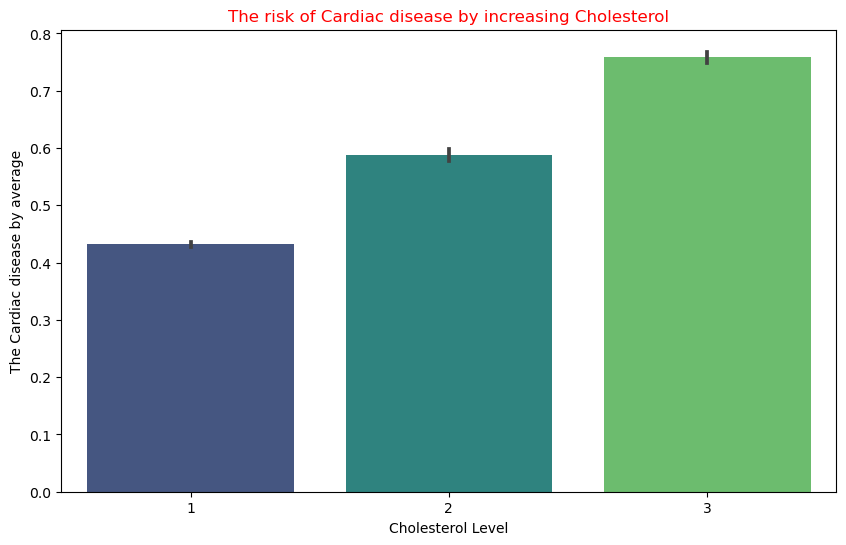

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cholesterol', y='cardio', data=df, palette='viridis')
plt.title('The risk of Cardiac disease by increasing Cholesterol',color='red')
plt.xlabel('Cholesterol Level')
plt.ylabel('The Cardiac disease by average')
plt.show()


#### Higher cholesterol levels are certainly linked with an increased risk of heart disease, according to a clear trend.


In [25]:
# Calculating BMI 
df['bmi'] = df['weight']/ ((df['height']/100)**2)
df.head(3)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_bin,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,45-50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,50-55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,52,50-55,23.507805


In [26]:
bmi_thresholds = [0,18.5,24.9,34.9,49.9, np.inf]

bmi_labels = ['UnderWeight', 'NormalWeight', 'OverWeight', 'ClassObesity_1','ClassObesity_2','ClassObesity_3']

In [27]:
df['bmi_class'] = np.digitize(df['bmi'], bins=bmi_thresholds, right=True)
df['bmi_class'] = df['bmi_class'].map(lambda x: bmi_labels[x-1] if 1 <= x <= 6 else 'Error')
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_bin,bmi,bmi_class
0,2,168,62.0,110,80,1,1,0,0,1,0,50,45-50,21.967120,NormalWeight
1,1,156,85.0,140,90,3,1,0,0,1,1,55,50-55,34.927679,ClassObesity_1
2,1,165,64.0,130,70,3,1,0,0,0,1,52,50-55,23.507805,NormalWeight
3,2,169,82.0,150,100,1,1,0,0,1,1,48,45-50,28.710479,OverWeight
4,1,156,56.0,100,60,1,1,0,0,0,0,48,45-50,23.011177,NormalWeight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,50-55,23.661439,NormalWeight
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,55-60,29.384757,OverWeight
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,50-55,26.927438,OverWeight
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,60-65,27.099251,OverWeight


In [28]:
df['bmi_class'] .value_counts(normalize = True)

OverWeight        0.570982
NormalWeight      0.361943
ClassObesity_1    0.064963
UnderWeight       0.002112
Name: bmi_class, dtype: float64

In [29]:
rating = []
for row in df['bmi']:
    if row < 18.5 :    rating.append(1) #UnderWeight
    elif row > 18.5 and row  < 24.9:   rating.append(2)#NormalWeight
    elif row > 24.9 and row < 29.9:  rating.append(3)#OverWeight
    elif row > 29.9 and row < 34.9:  rating.append(4)#ClassObesity_1
    elif row > 34.9 and row < 39.9:  rating.append(5)#ClassObesity_2
    elif row > 39.9 and row < 49.9:  rating.append(6)#ClassObesity_3
    elif row > 49.9:  rating.append('Error')
        
    else:           rating.append('Not_Rated')

In [30]:
df['BMI_Class'] = rating

In [31]:
df["BMI_Class"].value_counts(normalize=True)

3    0.391773
2    0.361943
4    0.179209
5    0.055801
6    0.009162
1    0.002112
Name: BMI_Class, dtype: float64

In [32]:
df["BMI_Class"].value_counts(normalize=True)
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_bin,bmi,bmi_class,BMI_Class
0,2,168,62.0,110,80,1,1,0,0,1,0,50,45-50,21.967120,NormalWeight,2
1,1,156,85.0,140,90,3,1,0,0,1,1,55,50-55,34.927679,ClassObesity_1,5
2,1,165,64.0,130,70,3,1,0,0,0,1,52,50-55,23.507805,NormalWeight,2
3,2,169,82.0,150,100,1,1,0,0,1,1,48,45-50,28.710479,OverWeight,3
4,1,156,56.0,100,60,1,1,0,0,0,0,48,45-50,23.011177,NormalWeight,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,50-55,23.661439,NormalWeight,2
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,55-60,29.384757,OverWeight,3
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,50-55,26.927438,OverWeight,3
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,60-65,27.099251,OverWeight,3


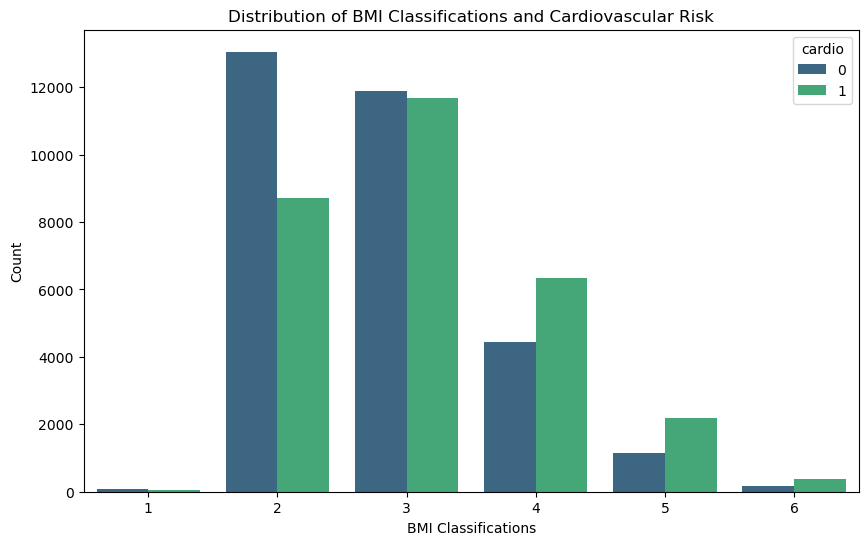

In [33]:
plt.figure(figsize=(10, 6))


sns.countplot(data=df, x='BMI_Class', hue='cardio', palette='viridis')


plt.title('Distribution of BMI Classifications and Cardiovascular Risk')
plt.xlabel('BMI Classifications')
plt.ylabel('Count')

# Show the plot
plt.show()

In [34]:
# Calcculating MAP
df['MAP'] = ((2*df['ap_lo']) + df['ap_hi'])/3

In [35]:
map_values = []
for row in df['MAP']:
    if row < 69.9:    map_values.append(1) #Low
    elif row > 70 and row  < 79.9:   map_values.append(2)#Normal
    elif row > 79.9 and row < 89.9:  map_values.append(3)#Normal
    elif row > 89.9 and row < 99.9:  map_values.append(4)#Normal
    elif row > 99.9 and row < 109.9:  map_values.append(5)#High
    elif row > 109.9 and row < 119.9:  map_values.append(6)#Normal
    elif row > 119.9:  map_values.append(7)
        
    else:           map_values.append('Not_Rated')

In [36]:
df['MAP_Class'] = map_values
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_bin,bmi,bmi_class,BMI_Class,MAP,MAP_Class
0,2,168,62.0,110,80,1,1,0,0,1,0,50,45-50,21.967120,NormalWeight,2,90.000000,4
1,1,156,85.0,140,90,3,1,0,0,1,1,55,50-55,34.927679,ClassObesity_1,5,106.666667,5
2,1,165,64.0,130,70,3,1,0,0,0,1,52,50-55,23.507805,NormalWeight,2,90.000000,4
3,2,169,82.0,150,100,1,1,0,0,1,1,48,45-50,28.710479,OverWeight,3,116.666667,6
4,1,156,56.0,100,60,1,1,0,0,0,0,48,45-50,23.011177,NormalWeight,2,73.333333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,50-55,23.661439,NormalWeight,2,103.333333,5
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,55-60,29.384757,OverWeight,3,103.333333,5
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,50-55,26.927438,OverWeight,3,93.333333,4
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,60-65,27.099251,OverWeight,3,98.333333,4


In [37]:
df= df[["gender","height","weight","bmi","ap_hi","ap_lo","MAP","age_years","age_bin","BMI_Class","MAP_Class","cholesterol","gluc","smoke","active","cardio"]]
df.head(3)

,gender,height,weight,bmi,ap_hi,ap_lo,MAP,age_years,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,2,168,62.0,21.967120,110,80,90.000000,50,45-50,2,4,1,1,0,1,0
1,1,156,85.0,34.927679,140,90,106.666667,55,50-55,5,5,3,1,0,1,1
2,1,165,64.0,23.507805,130,70,90.000000,52,50-55,2,4,3,1,0,0,1


### Data Preparation

In [38]:
df_cat =df[[
    'gender', 'age_bin','BMI_Class','MAP_Class','cholesterol','gluc','smoke','active','cardio'
]]

In [39]:
le = preprocessing.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,3,1,2,0,0,0,1,0
1,0,4,4,3,2,0,0,1,1
2,0,4,1,2,2,0,0,0,1
3,1,3,2,4,0,0,0,1,1
4,0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
69993,0,4,1,3,0,0,0,1,1
69994,0,5,2,3,0,0,0,1,1
69995,1,4,2,2,0,0,1,1,0
69998,0,6,2,2,0,1,0,0,1


In [40]:
df_male = df_cat.query("gender == 0")
df_female = df_cat.query("gender == 1")

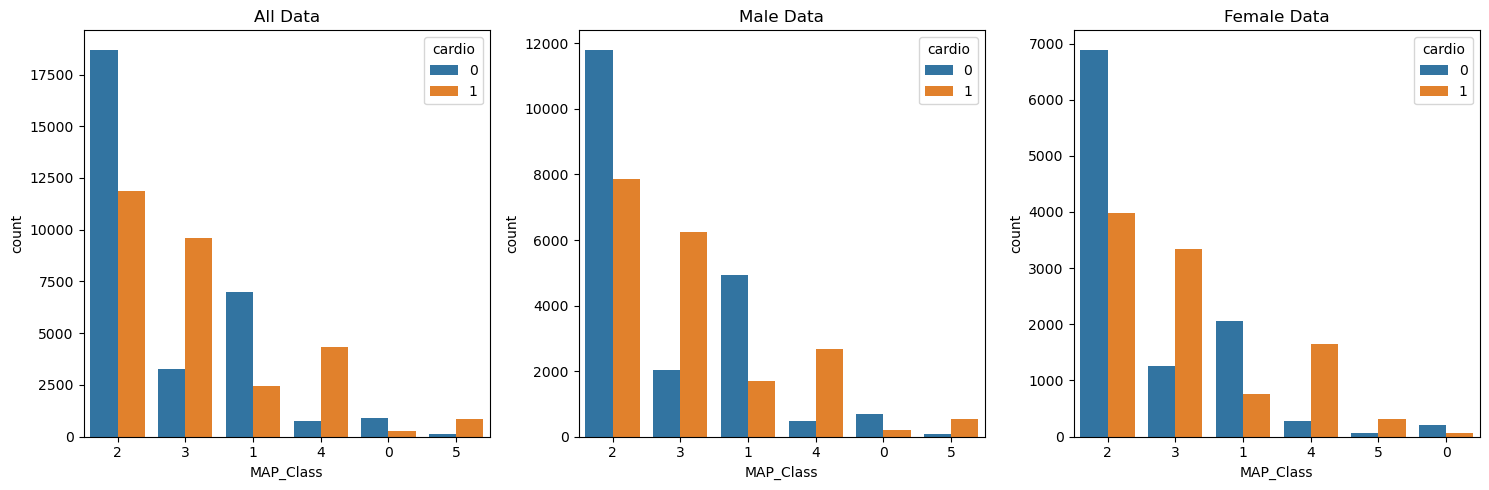

In [41]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['MAP_Class'],order=df_cat['MAP_Class'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['MAP_Class'],order=df_male['MAP_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['MAP_Class'],order=df_female['MAP_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

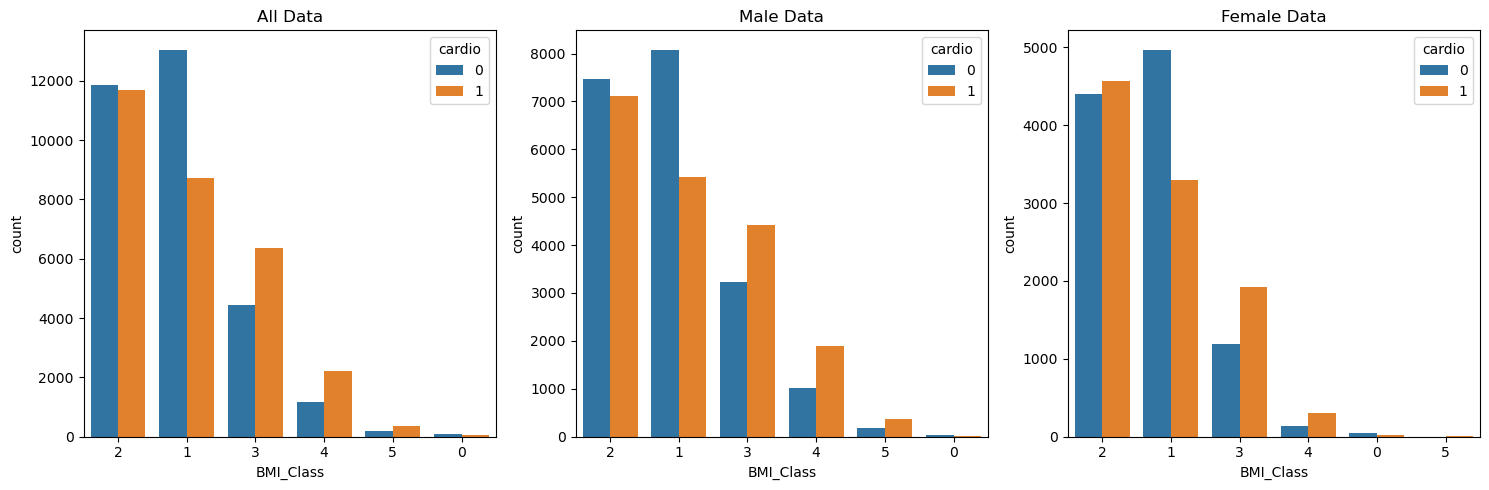

In [42]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['BMI_Class'],order=df_cat['BMI_Class'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['BMI_Class'],order=df_male['BMI_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['BMI_Class'],order=df_female['BMI_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

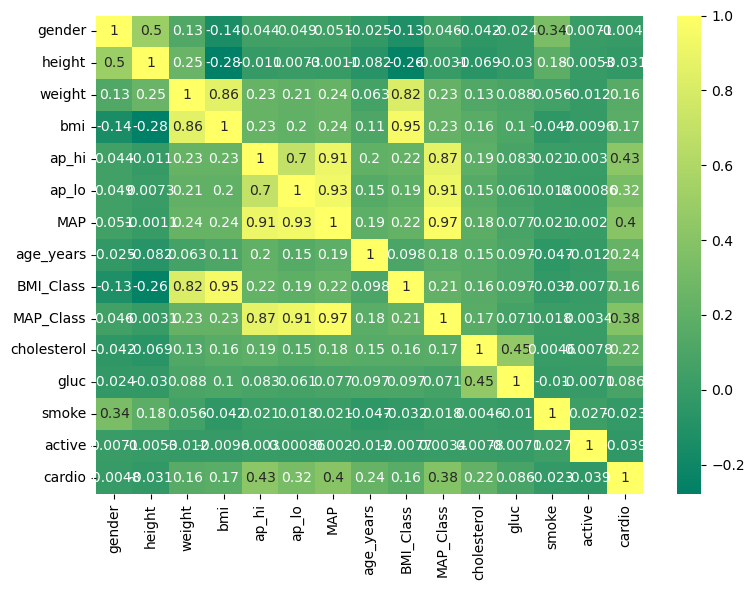

In [43]:
numeric_df = df.select_dtypes(include='number')
corr_pred = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_pred, annot=True, cmap='summer')
plt.tight_layout()

#### The correlation matrix for the dataset's numerical properties is shown in the heatmap; greater correlations, either positive or negative, are represented by darker colours. A few variables have moderate to strong correlations with other variables; these correlations may be significant for understanding the linkages in the data or for predictive modelling.

### Modelling

In [44]:
# D-Tree
data = pd.concat([df[['height','weight','bmi','ap_hi','ap_lo','MAP','age_years']],df_cat], axis = 1) 
data


,height,weight,bmi,ap_hi,ap_lo,MAP,age_years,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,168,62.0,21.967120,110,80,90.000000,50,1,3,1,2,0,0,0,1,0
1,156,85.0,34.927679,140,90,106.666667,55,0,4,4,3,2,0,0,1,1
2,165,64.0,23.507805,130,70,90.000000,52,0,4,1,2,2,0,0,0,1
3,169,82.0,28.710479,150,100,116.666667,48,1,3,2,4,0,0,0,1,1
4,156,56.0,23.011177,100,60,73.333333,48,0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,172,70.0,23.661439,130,90,103.333333,54,0,4,1,3,0,0,0,1,1
69994,165,80.0,29.384757,150,80,103.333333,58,0,5,2,3,0,0,0,1,1
69995,168,76.0,26.927438,120,80,93.333333,53,1,4,2,2,0,0,1,1,0
69998,163,72.0,27.099251,135,80,98.333333,61,0,6,2,2,0,1,0,0,1


In [45]:
X = data.drop(columns = ['cardio'])
y = data['cardio']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=1)
DT_clf = DecisionTreeClassifier(max_depth=3)
DT_clf.fit(X_train,y_train)
y_pred = DT_clf.predict(X_test)
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.7161780191764119


In [46]:
# Random Forest
X = data.drop(columns=['cardio'])
y = data['cardio']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.35,random_state=1)

RF_clf = RandomForestClassifier(n_estimators=50,max_depth=9)
RF_clf.fit(X_train,y_train)
y_pred = RF_clf.predict(X_test)
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.726603325415677


In [47]:
# Logistic regression
logm = LogisticRegression(max_iter=10000)
logm.fit(X_train, y_train)
logm.score(X_train, y_train)
logm.score(X_test, y_test)

0.719144893111639

In [48]:
# K Models
from kmodes.kmodes import KModes

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [49]:
df_male = df_cat.query("gender == 0")
df_female = df_cat.query("gender == 1")

In [50]:
km_huang = KModes(n_clusters=3, init = "Huang", n_init = 5, verbose=0)
female_clusters = km_huang.fit_predict(df_female)


In [51]:
import pickle
with open('female_clusters.pkl', 'wb') as file:
    pickle.dump(female_clusters, file)

In [52]:
km_huang_2 = KModes(n_clusters=3, init = "Huang", n_init = 5, verbose=0)
male_clusters = km_huang_2.fit_predict(df_male)


In [53]:
with open('male_clusters.pkl', 'wb') as file:
    pickle.dump(male_clusters, file)

In [54]:
df_female.insert(0,'Cluster', female_clusters, True)
df_male.insert(0,'Cluster', male_clusters, True)


In [55]:
df_clusters = pd.concat([df_female, df_male], ignore_index = True, sort = False)

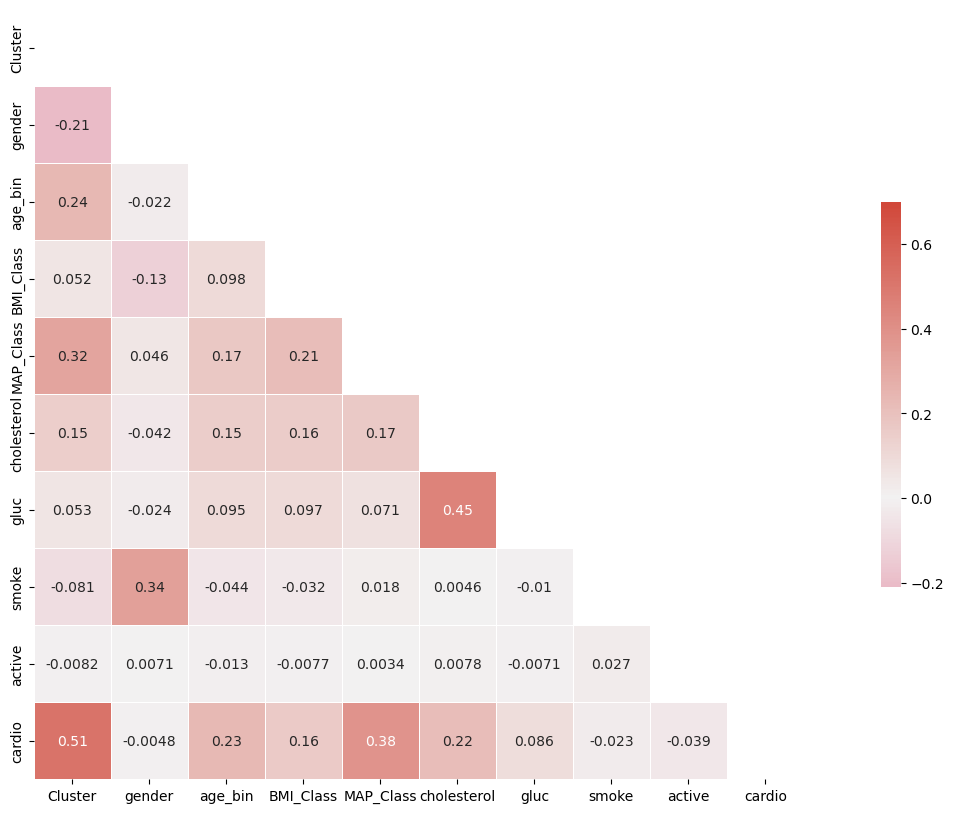

In [56]:
corr = df_clusters.corr()
cmap = sns.diverging_palette(2, 15, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### ML modeling

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.naive_bayes import GaussianNB

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_ml = df_clusters.apply(le.fit_transform)
df_ml.describe()


,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.00000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,0.782465,0.347311,4.042233,1.95213,2.237638,0.350953,0.220229,0.085631,0.803648,0.488228
std,0.801399,0.476120,1.377070,0.92357,0.938629,0.670076,0.567607,0.279820,0.397241,0.499866
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,1.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,4.000000,2.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,5.000000,2.00000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,1.000000,6.000000,5.00000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [59]:
X = df_clusters.drop(['cardio'], axis = 1)
y = df_clusters['cardio']

In [60]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [61]:
# Guussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)

acc_gaussian = round(gaussian.score(X_train, y_train)*100,2)
acc_gaussian


75.55

In [62]:
acc_gaussian_test = round(gaussian.score(X_test, y_test)*100,2)
acc_gaussian_test

74.82

In [63]:
acc_gaussian - acc_gaussian_test

0.730000000000004

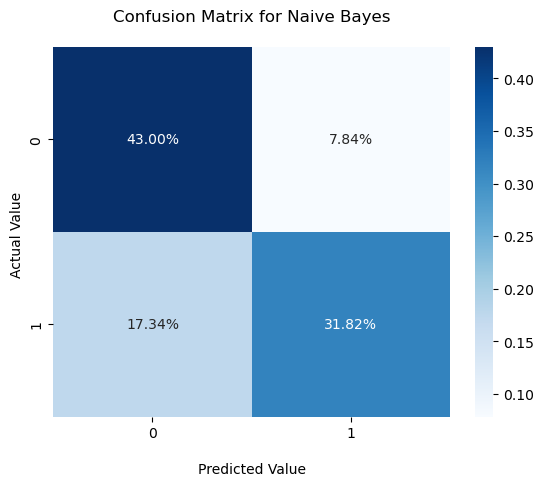

In [64]:
y_pred = gaussian.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()


In [65]:
# D-Tree
DT_clf = DecisionTreeClassifier(max_depth=3)
DT_clf.fit(X_train,y_train)
y_pred = DT_clf.predict(X_test)
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.7834063071551294


In [66]:
# D-Tree
DT_clf = DecisionTreeClassifier(max_depth=3)
DT_clf.fit(X_train,y_train)
y_pred = DT_clf.predict(X_test)
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7834063071551294


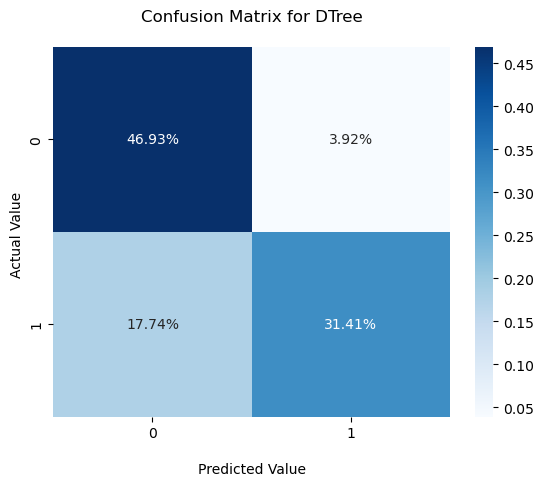

              precision    recall  f1-score   support

           0       0.73      0.92      0.81      9174
           1       0.89      0.64      0.74      8869

    accuracy                           0.78     18043
   macro avg       0.81      0.78      0.78     18043
weighted avg       0.81      0.78      0.78     18043



In [67]:
y_pred = DT_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for DTree\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred))

In [68]:
# Random-forest
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(X_train, y_train)
random_forest.fit(X_train,y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

85.25 {'n_estimators': 300}


In [69]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(random_forest, open(filename, 'wb'))

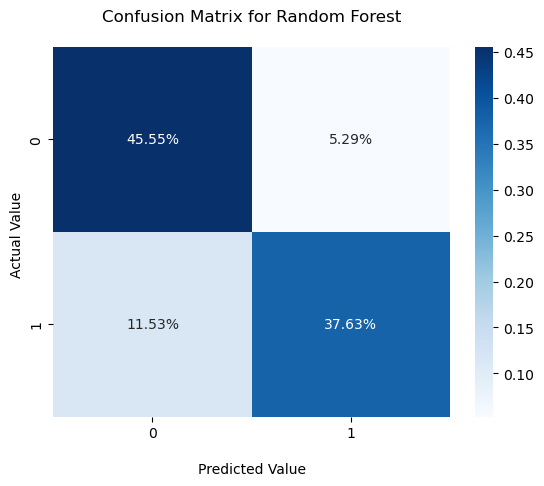

              precision    recall  f1-score   support

           0       0.80      0.90      0.84      9174
           1       0.88      0.77      0.82      8869

    accuracy                           0.83     18043
   macro avg       0.84      0.83      0.83     18043
weighted avg       0.84      0.83      0.83     18043



In [70]:
y_pred = random_forest.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred))

In [71]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

78.5

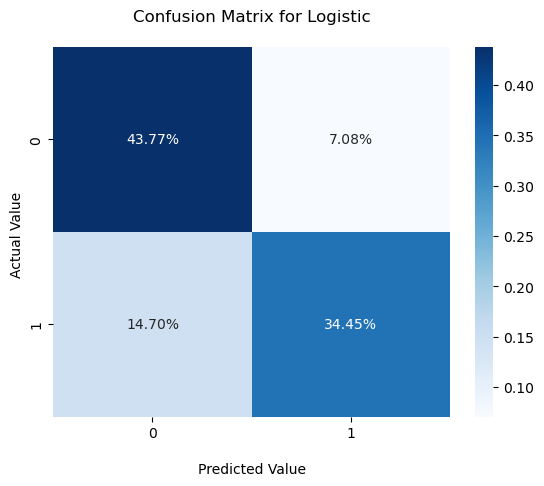

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      9174
           1       0.83      0.70      0.76      8869

    accuracy                           0.78     18043
   macro avg       0.79      0.78      0.78     18043
weighted avg       0.79      0.78      0.78     18043



In [72]:
y_pred = logreg.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred))

In [73]:

from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [74]:
X_train

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active
46687,1,0,3,4,2,0,0,0,0
5503,1,1,2,2,2,1,1,1,1
23757,0,0,5,3,2,1,0,0,1
37872,2,0,6,2,4,2,2,0,0
38459,0,0,4,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...
50057,2,0,5,2,1,1,1,0,0
32511,0,0,4,1,2,0,0,0,1
5192,0,1,6,1,2,0,0,0,1
12172,1,1,5,2,2,0,0,0,1


In [75]:
y_train

46687    0
5503     1
23757    0
37872    1
38459    0
        ..
50057    0
32511    0
5192     0
12172    0
33003    0
Name: cardio, Length: 42099, dtype: int64

In [76]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.78
Confusion Matrix:
[[5410  706]
 [1917 3996]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80      6116
           1       0.85      0.68      0.75      5913

    accuracy                           0.78     12029
   macro avg       0.79      0.78      0.78     12029
weighted avg       0.79      0.78      0.78     12029



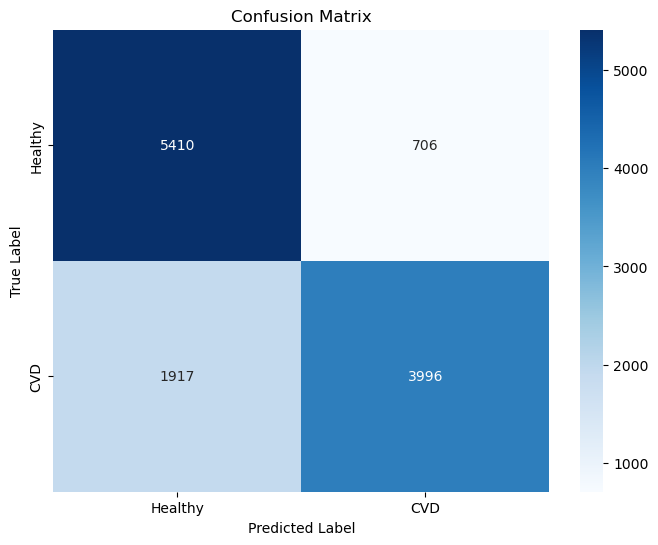

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'CVD'], yticklabels=['Healthy', 'CVD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [78]:
ANN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)),
    # Hidden Layers
    tf.keras.layers.Dense(units=30, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=40, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=40, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=30, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification, so 1 unit with sigmoid activation
])

# Use binary_crossentropy for binary classification
ANN.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = ANN.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=50)


Epoch 1/20


963/963 [==============================] - 8s 4ms/step - loss: 0.5699 - accuracy: 0.7080 - val_loss: 0.4893 - val_accuracy: 0.7776
Epoch 2/20
963/963 [==============================] - 5s 5ms/step - loss: 0.4931 - accuracy: 0.7798 - val_loss: 0.4715 - val_accuracy: 0.7900
Epoch 3/20
963/963 [==============================] - 5s 6ms/step - loss: 0.4750 - accuracy: 0.7907 - val_loss: 0.4498 - val_accuracy: 0.8061
Epoch 4/20
963/963 [==============================] - 4s 5ms/step - loss: 0.4636 - accuracy: 0.7942 - val_loss: 0.4397 - val_accuracy: 0.8058
Epoch 5/20
963/963 [==============================] - 4s 4ms/step - loss: 0.4536 - accuracy: 0.7979 - val_loss: 0.4223 - val_accuracy: 0.8071
Epoch 6/20
963/963 [==============================] - 5s 6ms/step - loss: 0.4479 - accuracy: 0.7982 - val_loss: 0.4272 - val_accuracy: 0.8052
Epoch 7/20
963/963 [==============================] - 5s 5ms/step - loss: 0.4423 - accuracy: 0.8000 - val_loss: 0.4303 - val_accuracy: 0.7952
Epo

#### The ANN model has completed training for 20 epochs, and the final accuracy on the training set is approximately 85.60%. The validation accuracy is approximately 86.10%. The loss on the training set is 0.3311, and on the validation set, it is 0.3084. These results indicate that the model has achieved a relatively high accuracy and low loss, suggesting that it has learned meaningful patterns from the data and is performing well.

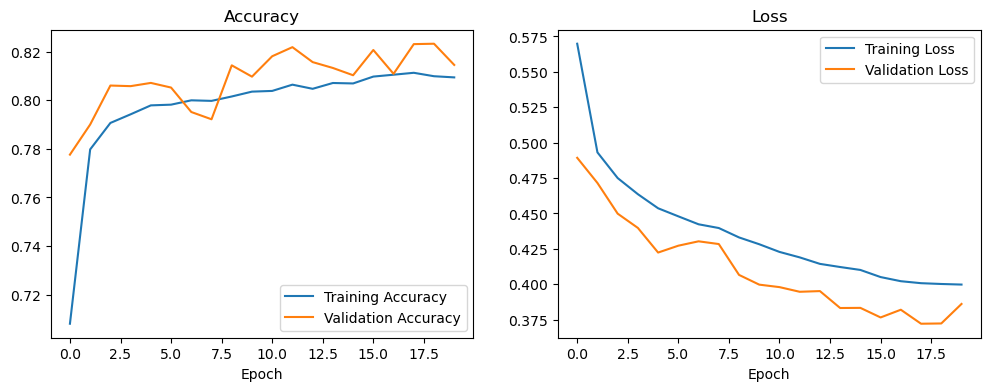

In [79]:
import matplotlib.pyplot as plt

# Access training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [80]:
y_pred = np.round(ANN.predict(X_test))

# Convert predictions to binary values (0 or 1)
y_pred = y_pred.astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))

376/376 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      6116
           1       0.92      0.69      0.78      5913

    accuracy                           0.81     12029
   macro avg       0.84      0.81      0.81     12029
weighted avg       0.83      0.81      0.81     12029



In [ ]:
import optuna
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, recall_score

# Define the objective function
def objective(trial):
    cnn_params = {
        'dense1': trial.suggest_int('dense1', 100, 600),
        'dense2': trial.suggest_int('dense2', 100, 600),
        'dense3': trial.suggest_int('dense3', 100, 600),
        'dense4': trial.suggest_int('dense4', 100, 600),
        'dense5': trial.suggest_int('dense5', 100, 600),
        'drop1': trial.suggest_float('drop1', 0.2, 0.9),
        'drop2': trial.suggest_float('drop2', 0.2, 0.9),
        'drop3': trial.suggest_float('drop3', 0.2, 0.9),
        'drop4': trial.suggest_float('drop4', 0.2, 0.9),
        'drop5': trial.suggest_float('drop5', 0.2, 0.9),
        'epochs': trial.suggest_int('epochs', 10, 50)
    }
    
    model_network = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=X.shape[1], activation='relu', input_shape=(X.shape[1],)),
        # Hidden Layers
        tf.keras.layers.Dense(units=cnn_params['dense1'], activation='relu'),
        tf.keras.layers.Dropout(rate=cnn_params['drop1']),
        tf.keras.layers.Dense(units=cnn_params['dense2'], activation='relu'),
        tf.keras.layers.Dropout(cnn_params['drop2']),
        tf.keras.layers.Dense(units=cnn_params['dense3'], activation='relu'),
        tf.keras.layers.Dropout(cnn_params['drop3']),
        tf.keras.layers.Dense(units=cnn_params['dense4'], activation='relu'),
        tf.keras.layers.Dropout(cnn_params['drop4']),
        tf.keras.layers.Dense(units=cnn_params['dense5'], activation='relu'),
        tf.keras.layers.Dropout(cnn_params['drop5']),
        # Output Layer
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    model_network.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    batch_size = 256
    E = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    R = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
    steps_per_epoch = round(X_train.shape[0] / batch_size)
    
    history = model_network.fit(
        X_train,
        y_train,
        steps_per_epoch=steps_per_epoch,
        epochs=cnn_params['epochs'],
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        callbacks=[E, R],
        verbose=0
    )
    
    y_preds = model_network.predict(X_test)
    y_pred = (y_preds > 0.5).astype(int)
    y_true = y_test.values
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    
    # Return accuracy for optimization
    accuracy = (y_pred == y_true).mean()
    return accuracy

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')  # Optimize for accuracy
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params


[I 2023-12-09 21:14:05,141] A new study created in memory with name: no-name-2702447a-b7c4-4238-a6f9-c7e6ca791c97


376/376 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.92      0.81      6116
           1       0.89      0.64      0.75      5913

    accuracy                           0.79     12029
   macro avg       0.81      0.78      0.78     12029
weighted avg       0.81      0.79      0.78     12029

[[5643  473]
 [2101 3812]]


[I 2023-12-09 21:14:27,765] Trial 0 finished with value: 0.5024263729434149 and parameters: {'dense1': 506, 'dense2': 142, 'dense3': 201, 'dense4': 127, 'dense5': 201, 'drop1': 0.35452249886353965, 'drop2': 0.5762430430848599, 'drop3': 0.6380375776728069, 'drop4': 0.7848368298524147, 'drop5': 0.26276763993045155, 'epochs': 33}. Best is trial 0 with value: 0.5024263729434149.


376/376 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.73      0.94      0.82      6116
           1       0.92      0.64      0.75      5913

    accuracy                           0.79     12029
   macro avg       0.82      0.79      0.79     12029
weighted avg       0.82      0.79      0.79     12029

[[5777  339]
 [2148 3765]]


[I 2023-12-09 21:15:24,311] Trial 1 finished with value: 0.5026803038498954 and parameters: {'dense1': 104, 'dense2': 476, 'dense3': 318, 'dense4': 122, 'dense5': 146, 'drop1': 0.33481813355787593, 'drop2': 0.4233557815313407, 'drop3': 0.8397605364723244, 'drop4': 0.8119580922524463, 'drop5': 0.5886339256898012, 'epochs': 16}. Best is trial 1 with value: 0.5026803038498954.


376/376 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      6116
           1       0.90      0.63      0.74      5913

    accuracy                           0.78     12029
   macro avg       0.81      0.78      0.78     12029
weighted avg       0.81      0.78      0.78     12029

[[5703  413]
 [2210 3703]]


[I 2023-12-09 21:16:19,950] Trial 2 finished with value: 0.5026634686516757 and parameters: {'dense1': 394, 'dense2': 445, 'dense3': 121, 'dense4': 501, 'dense5': 563, 'drop1': 0.7294443692853063, 'drop2': 0.783811380503725, 'drop3': 0.37522724741111035, 'drop4': 0.6413665579352482, 'drop5': 0.8205059458822921, 'epochs': 30}. Best is trial 1 with value: 0.5026803038498954.


376/376 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.70      0.97      0.81      6116
           1       0.94      0.58      0.71      5913

    accuracy                           0.77     12029
   macro avg       0.82      0.77      0.76     12029
weighted avg       0.82      0.77      0.76     12029

[[5904  212]
 [2510 3403]]


[I 2023-12-09 21:17:18,160] Trial 3 finished with value: 0.5033663381773483 and parameters: {'dense1': 339, 'dense2': 446, 'dense3': 263, 'dense4': 361, 'dense5': 225, 'drop1': 0.7781177427252812, 'drop2': 0.7415934286056509, 'drop3': 0.798442642271358, 'drop4': 0.7000885215335502, 'drop5': 0.5544052611272627, 'epochs': 27}. Best is trial 3 with value: 0.5033663381773483.


376/376 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.68      0.96      0.79      6116
           1       0.93      0.52      0.67      5913

    accuracy                           0.75     12029
   macro avg       0.80      0.74      0.73     12029
weighted avg       0.80      0.75      0.73     12029

[[5893  223]
 [2833 3080]]


[I 2023-12-09 21:17:54,283] Trial 4 finished with value: 0.5038040533310606 and parameters: {'dense1': 422, 'dense2': 110, 'dense3': 161, 'dense4': 217, 'dense5': 320, 'drop1': 0.48475027066791315, 'drop2': 0.7876632777451109, 'drop3': 0.8597485497485953, 'drop4': 0.41401937205847283, 'drop5': 0.5755117317955996, 'epochs': 14}. Best is trial 4 with value: 0.5038040533310606.


376/376 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      6116
           1       0.92      0.59      0.72      5913

    accuracy                           0.78     12029
   macro avg       0.81      0.77      0.77     12029
weighted avg       0.81      0.78      0.77     12029

[[5821  295]
 [2408 3505]]


[I 2023-12-09 21:19:11,564] Trial 5 finished with value: 0.5031067955381279 and parameters: {'dense1': 325, 'dense2': 175, 'dense3': 579, 'dense4': 442, 'dense5': 201, 'drop1': 0.8408571877641846, 'drop2': 0.33369818649884103, 'drop3': 0.38411018839822303, 'drop4': 0.20329761413597325, 'drop5': 0.5185196738321249, 'epochs': 37}. Best is trial 4 with value: 0.5038040533310606.


376/376 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.54      0.99      0.70      6116
           1       0.93      0.14      0.24      5913

    accuracy                           0.57     12029
   macro avg       0.73      0.56      0.47     12029
weighted avg       0.73      0.57      0.48     12029

[[6051   65]
 [5090  823]]


[I 2023-12-09 21:20:02,393] Trial 6 finished with value: 0.5071921369727761 and parameters: {'dense1': 216, 'dense2': 147, 'dense3': 191, 'dense4': 345, 'dense5': 562, 'drop1': 0.6116289304799724, 'drop2': 0.686518110566166, 'drop3': 0.8939907602423587, 'drop4': 0.3955678680065434, 'drop5': 0.8618199713426844, 'epochs': 23}. Best is trial 6 with value: 0.5071921369727761.


376/376 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      6116
           1       0.91      0.70      0.79      5913

    accuracy                           0.82     12029
   macro avg       0.84      0.82      0.82     12029
weighted avg       0.84      0.82      0.82     12029

[[5710  406]
 [1757 4156]]


[I 2023-12-09 21:21:53,633] Trial 7 finished with value: 0.5020377604511767 and parameters: {'dense1': 201, 'dense2': 251, 'dense3': 525, 'dense4': 561, 'dense5': 127, 'drop1': 0.45791438967859105, 'drop2': 0.42019783416172374, 'drop3': 0.7219209167409852, 'drop4': 0.30503746921040514, 'drop5': 0.34336026195399866, 'epochs': 21}. Best is trial 6 with value: 0.5071921369727761.


376/376 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.95      0.82      6116
           1       0.93      0.63      0.75      5913

    accuracy                           0.79     12029
   macro avg       0.82      0.79      0.78     12029
weighted avg       0.82      0.79      0.79     12029

[[5818  298]
 [2215 3698]]


[I 2023-12-09 21:24:14,982] Trial 8 finished with value: 0.5028318206338728 and parameters: {'dense1': 384, 'dense2': 361, 'dense3': 519, 'dense4': 587, 'dense5': 204, 'drop1': 0.6837626396011836, 'drop2': 0.3685531623971432, 'drop3': 0.7743165014968452, 'drop4': 0.4064747846446249, 'drop5': 0.7885117360373819, 'epochs': 20}. Best is trial 6 with value: 0.5071921369727761.


376/376 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.71      0.95      0.82      6116
           1       0.93      0.61      0.73      5913

    accuracy                           0.78     12029
   macro avg       0.82      0.78      0.77     12029
weighted avg       0.82      0.78      0.78     12029

[[5832  284]
 [2335 3578]]


[I 2023-12-09 21:25:15,422] Trial 9 finished with value: 0.5030198136806594 and parameters: {'dense1': 313, 'dense2': 248, 'dense3': 308, 'dense4': 287, 'dense5': 445, 'drop1': 0.7256916446621968, 'drop2': 0.8492613601810977, 'drop3': 0.6284704620819254, 'drop4': 0.7835612623124328, 'drop5': 0.6575059193752704, 'epochs': 23}. Best is trial 6 with value: 0.5071921369727761.
